In [195]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans


from matplotlib import pyplot
%matplotlib inline

In [184]:
nyc_rac = pd.read_csv("ny_rac_S000_JT02_2012.csv", dtype = {'h_geocode': object})

count_filter = ['36005', '36047', '36061', '36081', '36085']
nyc_rac = nyc_rac[nyc_rac['h_geocode'].apply(lambda x: x[0:5]).isin(count_filter)]

In [ ]:
nyc_rac = nyc_rac[list(nyc_rac.columns)[:-1]]

In [175]:
nyc_rac.loc[:,('group_code')] = nyc_rac['h_geocode'].apply(lambda x: x[:-4])

In [180]:
nyc_rac_grouped = nyc_rac.groupby('group_code')[list(nyc_rac.columns)[:-1]].agg('sum')
del nyc_rac_grouped['createdate']

In [191]:
nyc_rac_grouped = nyc_rac_grouped[list(nyc_rac_grouped.columns)[7:27]]

In [192]:
nyc_rac_grouped.head()

,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20
group_code,,,,,,,,,,,,,,,,,,,,
36005000100,1,0,1,39,32,37,125,46,18,19,22,25,5,78,22,219,13,77,32,0
36005000200,0,0,5,27,35,57,178,50,31,47,50,59,22,81,49,269,33,104,62,0
36005000400,0,0,9,59,42,76,179,64,51,84,79,114,30,106,73,357,32,160,78,0
36005001600,1,0,8,44,41,41,230,59,44,59,81,94,23,116,74,442,37,110,74,0
36005001900,0,1,2,21,33,41,91,22,21,49,24,40,13,48,26,149,13,75,37,0


In [194]:
group_code_index = nyc_rac_grouped.index

In [196]:
rac_array = nyc_rac_grouped.values 

In [199]:
rac_array = rac_array.astype(float)

In [215]:
data = scale(rac_array)

In [217]:
n_samples, n_features = data.shape

In [218]:
number_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [250]:
k = number_k[3]
kmeans = KMeans(n_clusters=k)

In [251]:
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [252]:
labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

In [253]:
centroids = kmeans.cluster_centers_

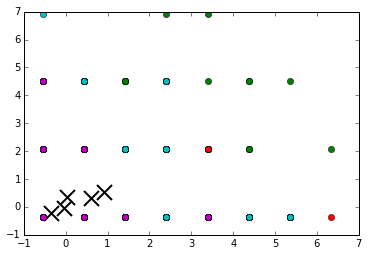

In [259]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = data[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)

pyplot.show()

In [261]:
ds = data[np.where(labels==2)]

In [278]:
ds.shape
# ds[1:]

(90, 20)

In [269]:
ds[1]

array([-0.55091273, -0.3654828 , -1.12780057,  0.14636292,  0.04818897,
        3.37719486,  1.15324515, -0.30914533,  5.00542389,  8.15541837,
        2.52479444,  6.11438731,  6.41623629,  2.23158552,  1.87404425,
        0.02424741,  2.66156816,  2.04551309,  2.38905102, -0.10580184])

In [276]:
test = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15], [16,12,14,15,12]])

In [281]:
test[:,2]

array([ 3,  8, 13, 14])

In [282]:
ds

array([[ 1.42000939, -0.3654828 ,  9.01562048, ...,  5.34926398,
         6.4172534 , -0.10580184],
       [-0.55091273, -0.3654828 , -1.12780057, ...,  2.04551309,
         2.38905102, -0.10580184],
       [-0.55091273, -0.3654828 , -0.87421505, ...,  0.6439218 ,
         0.69980486, -0.10580184],
       ..., 
       [ 0.43454833, -0.3654828 , -0.367044  , ...,  2.65870928,
         2.23312061, -0.10580184],
       [ 2.40547045,  2.0650899 ,  0.39371258, ...,  1.95791363,
         1.60939895, -0.10580184],
       [ 2.40547045, -0.3654828 ,  0.39371258, ...,  1.31968903,
         1.66137575, -0.10580184]])